# Data Cleaning

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#reading in the train data
train_df = pd.read_csv('../datasets/train.csv')
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
#filling in the NaN values with 0
train_df = train_df.fillna(0)
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,0.0,13517,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,0,Reg,Lvl,...,0,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,0,Reg,Lvl,...,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,3,2010,WD,138500


In [4]:
#2051 rows by 81 columns
train_df.shape

(2051, 81)

In [5]:
#checking if there are any missing values left
train_df.isna().sum()

Id              0
PID             0
MS SubClass     0
MS Zoning       0
Lot Frontage    0
               ..
Misc Val        0
Mo Sold         0
Yr Sold         0
Sale Type       0
SalePrice       0
Length: 81, dtype: int64

In [6]:
#checking to see if all the dates types make sense
train_df.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [7]:
#looking at these stats, the data seems to be good
#no negative values for lot frontage or lot area
#no half bedrooms or bathrooms
train_df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,57.944417,10065.208191,6.112140,5.562165,1971.708922,1984.190151,98.626524,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,33.137332,6742.488909,1.426271,1.104497,30.177889,21.036250,174.324690,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,43.500000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,63.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,78.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [8]:
train_df

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,0.0,13517,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,0,Reg,Lvl,...,0,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,0,Reg,Lvl,...,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,0,IR1,HLS,...,0,0,0,0,0,0,1,2008,WD,298751
2047,785,905377130,30,RL,0.0,12342,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,0,Reg,Bnk,...,0,0,0,0,0,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,0,Reg,Lvl,...,0,0,0,0,0,0,11,2009,WD,144000


In [9]:
#reading in the test data
test_df = pd.read_csv('../datasets/test.csv')
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [10]:
#filled all the NaN columns with 0
test_df = test_df.fillna(0)
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,0,0,0,0,4,2006,WD
1,2718,905108090,90,RL,0.0,9662,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,0,Reg,Lvl,...,0,0,0,0,0,0,0,7,2007,WD
4,625,535105100,20,RL,0.0,9500,Pave,0,IR1,Lvl,...,0,185,0,0,0,0,0,7,2009,WD


In [11]:
#878 rows by 80 columns
test_df.shape

(878, 80)

In [12]:
#checking if there are any missing values left
test_df.isna().sum()

Id              0
PID             0
MS SubClass     0
MS Zoning       0
Lot Frontage    0
               ..
Misc Feature    0
Misc Val        0
Mo Sold         0
Yr Sold         0
Sale Type       0
Length: 80, dtype: int64

In [13]:
#checking to see if all the dates types make sense
test_df.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Feature     object
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
Length: 80, dtype: object

In [14]:
#looking at these stats, the data seems to be good
#no negative values for lot frontage or lot area
#no half bedrooms or bathrooms
test_df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,878.000000,8.780000e+02,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,...,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1444.749431,7.162867e+08,58.268793,56.872437,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.115034,...,470.362187,93.430524,47.070615,24.064920,2.597950,14.830296,1.884966,48.498861,6.202733,2007.825740
std,850.838263,1.889103e+08,42.235407,34.269502,10002.674602,1.369065,1.128903,30.395895,20.450725,187.086530,...,212.734075,121.181702,68.180939,73.249463,24.962482,53.003794,29.916672,550.169317,2.642498,1.327861
min,2.000000,5.263021e+08,20.000000,0.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.250000,5.284841e+08,20.000000,40.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,...,322.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1433.000000,5.354542e+08,50.000000,60.000000,9446.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,...,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.500000,9.071904e+08,70.000000,78.000000,11589.000000,7.000000,6.000000,1999.750000,2003.000000,171.750000,...,576.000000,170.750000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,...,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


# Linear Regression Model

In [15]:
#went through the columns and decided which ones contributed to the sale price of a house
X = train_df[['Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area']]
y = train_df['SalePrice']

In [16]:
#performing the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
#instantiate and fitting the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
#predicted value based on features
y_pred = lr.predict(X_test)
#y_pred

In [19]:
lr.intercept_

-1200770.8961614706

In [20]:
#score of 0.79 on the train data
lr.score(X_train, y_train)

0.7915915180932377

In [21]:
#score of 0.85 on the test data
lr.score(X_test, y_test)

0.8546748968424702

In [22]:
lr.coef_

array([ 1.73677998e+04,  3.42708118e+03,  3.27991627e+02,  2.51247653e+02,
        1.76734934e+01,  5.14135022e+01,  3.87993908e+01, -6.95303265e+02,
       -7.87631235e+02, -7.21432756e+03, -2.26333631e+04,  5.84197330e+03,
        8.13500837e+03,  4.82289314e+03,  3.17845103e+01])

In [23]:
set(zip(X.columns, lr.coef_))

{('1st Flr SF', 51.413502190815954),
 ('2nd Flr SF', 38.799390751807785),
 ('Bedroom AbvGr', -7214.327559321866),
 ('Fireplaces', 8135.008366874561),
 ('Full Bath', -695.3032649671043),
 ('Garage Area', 31.78451031653866),
 ('Garage Cars', 4822.893138129294),
 ('Half Bath', -787.6312348212992),
 ('Kitchen AbvGr', -22633.36313309332),
 ('Overall Cond', 3427.0811751790598),
 ('Overall Qual', 17367.799776621065),
 ('TotRms AbvGrd', 5841.9732951946025),
 ('Total Bsmt SF', 17.67349341328239),
 ('Year Built', 327.99162650760763),
 ('Year Remod/Add', 251.247653479124)}

In [24]:
#interpretation example:
#for a one unit increase in overall condition, we expect the saleprice to increase $3735.51

In [25]:
y_pred = lr.predict(X)
y_pred

array([175399.04841617, 232952.06019974, 124784.41247932, ...,
       186611.16947061, 122249.88179996, 222636.0664662 ])

In [26]:
#calculate r2 score - 0.80
metrics.r2_score(y, y_pred)

0.8035617981782686

In [27]:
#MSE
metrics.mean_squared_error(y, y_pred)

1233410367.9404898

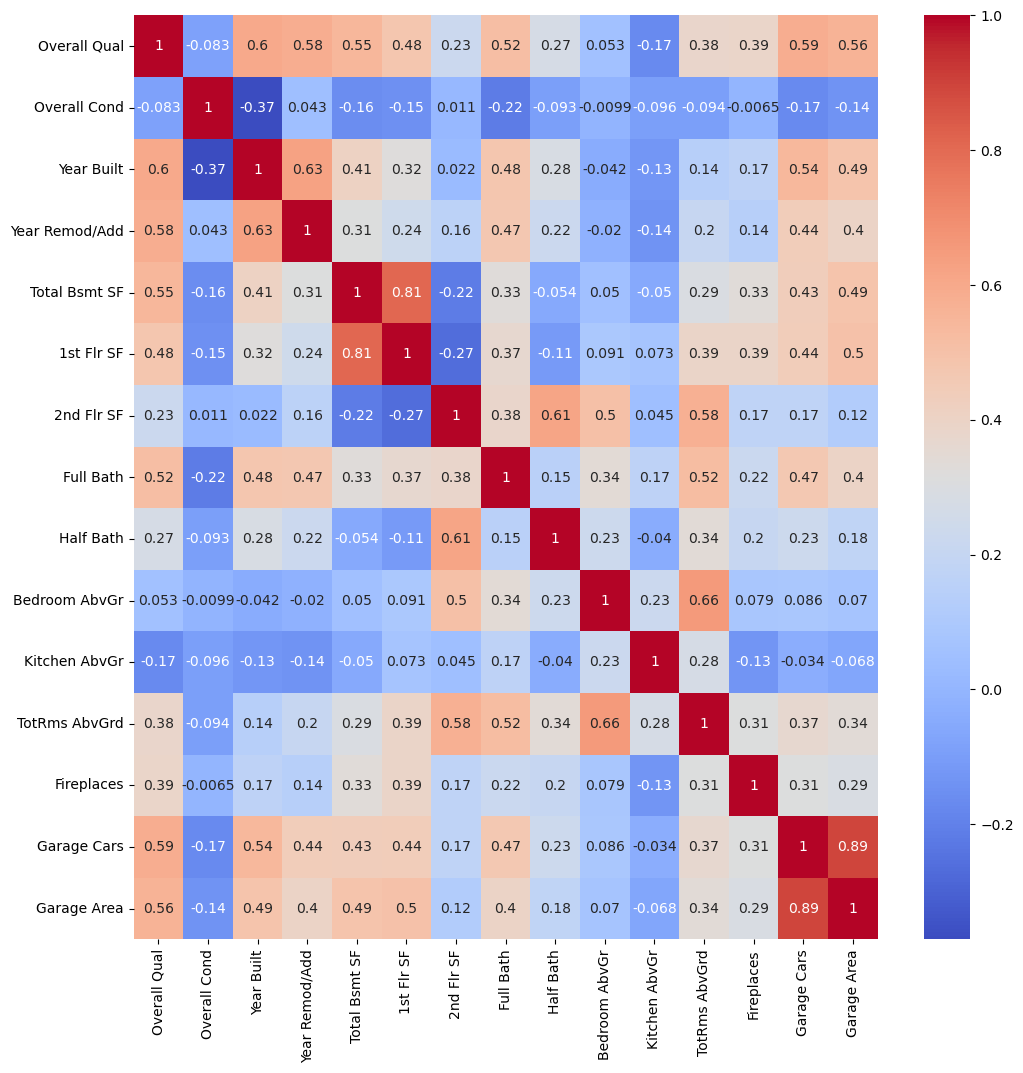

In [28]:
plt.figure(figsize=(12, 12))
sns.heatmap(X.corr(), cmap='coolwarm', annot=True,);

In [29]:
test = test_df[['Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area']] 

In [30]:
predictions = lr.predict(test)

In [31]:
test_df['SalePrice'] = predictions

In [32]:
submission = test_df[['Id', 'SalePrice']]

In [33]:
submission.to_csv('submission_file.csv', index=False)